In [47]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [48]:
Loan = pd.read_csv("D:\\data_science_repo\\Load_Prediction\\Loan_Prediction.csv")

In [49]:
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [50]:
Loan['Total_Income'] = Loan['ApplicantIncome'] + Loan['CoapplicantIncome']

In [51]:
Load = Loan.drop({'ApplicantIncome', 'CoapplicantIncome','Loan_ID','Education'}, axis=1, inplace=True)

In [52]:
Loan.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,Yes,0,No,110.0,360.0,1.0,Urban,5720
1,Male,Yes,1,No,126.0,360.0,1.0,Urban,4576
2,Male,Yes,2,No,208.0,360.0,1.0,Urban,6800
3,Male,Yes,2,No,100.0,360.0,NaN,Urban,4886
4,Male,No,0,No,78.0,360.0,1.0,Urban,3276


In [53]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            356 non-null    object 
 1   Married           367 non-null    object 
 2   Dependents        357 non-null    object 
 3   Self_Employed     344 non-null    object 
 4   LoanAmount        362 non-null    float64
 5   Loan_Amount_Term  361 non-null    float64
 6   Credit_History    338 non-null    float64
 7   Property_Area     367 non-null    object 
 8   Total_Income      367 non-null    int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 25.9+ KB


In [54]:
Loan.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
count,362.000000,361.000000,338.000000,367.000000
mean,136.132597,342.537396,0.825444,6375.177112
std,61.366652,65.156643,0.380150,5199.423594
min,28.000000,6.000000,0.000000,1760.000000
25%,100.250000,360.000000,1.000000,4156.000000
50%,125.000000,360.000000,1.000000,5205.000000
75%,158.000000,360.000000,1.000000,6980.000000
max,550.000000,480.000000,1.000000,72529.000000


In [55]:
Loan.isna().sum()

Gender              11
Married              0
Dependents          10
Self_Employed       23
LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
Property_Area        0
Total_Income         0
dtype: int64

## Data Preprocessing

In [56]:
#Handle categorical values in data
Loan["Gender"] = Loan["Gender"].fillna(Loan["Gender"].mode()[0])
Loan["Self_Employed"] = Loan["Self_Employed"].fillna(Loan["Self_Employed"].mode()[0])

In [57]:
Loan.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,Yes,0,No,110.0,360.0,1.0,Urban,5720
1,Male,Yes,1,No,126.0,360.0,1.0,Urban,4576
2,Male,Yes,2,No,208.0,360.0,1.0,Urban,6800
3,Male,Yes,2,No,100.0,360.0,NaN,Urban,4886
4,Male,No,0,No,78.0,360.0,1.0,Urban,3276


In [58]:
# handle numerical data 

Loan["Credit_History"] = Loan["Credit_History"].fillna(Loan["Credit_History"].mean())
Loan["Loan_Amount_Term"] = Loan["Loan_Amount_Term"].fillna(Loan["Loan_Amount_Term"].mean())
Loan["LoanAmount"] = Loan["LoanAmount"].fillna(Loan["LoanAmount"].mean())



In [59]:
Loan.isna().sum()

Gender               0
Married              0
Dependents          10
Self_Employed        0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_Income         0
dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

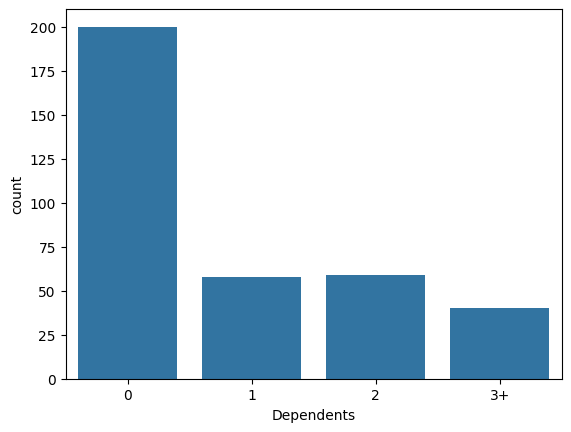

In [60]:
# handle missing values in Dependents column
sns.countplot(data = Loan, x="Dependents")

In [61]:
Loan["Dependents"] = Loan["Dependents"].fillna(0)

In [62]:
Loan.isna().sum()

Gender              0
Married             0
Dependents          0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Total_Income        0
dtype: int64

### Exploratory Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

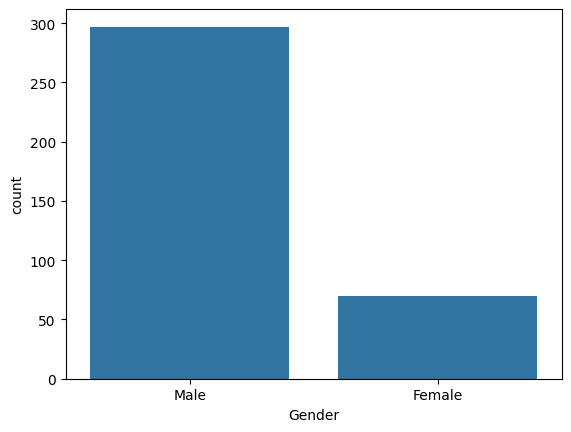

In [63]:
# categorical data
sns.countplot(data = Loan, x="Gender")

<Axes: xlabel='Self_Employed', ylabel='count'>

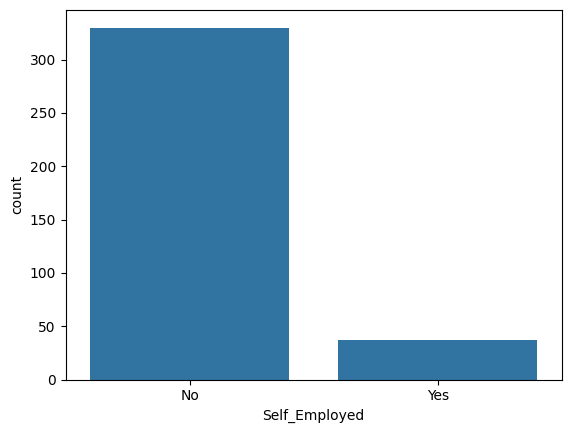

In [64]:
sns.countplot(data = Loan, x="Self_Employed")

In [65]:
Loan.columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income'],
      dtype='object')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4624\2004210312.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Loan.LoanAmount)


<Axes: xlabel='LoanAmount', ylabel='Density'>

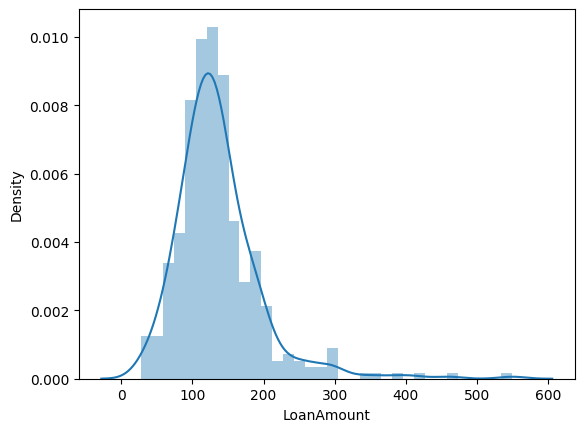

In [66]:
sns.distplot(Loan.LoanAmount)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4624\1045389488.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Loan.Credit_History)


<Axes: xlabel='Credit_History', ylabel='Density'>

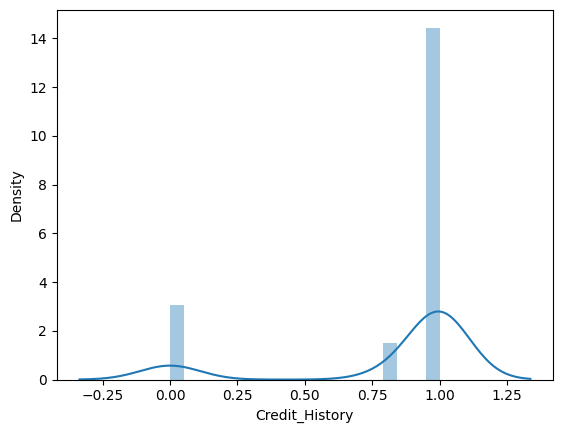

In [67]:
sns.distplot(Loan.Credit_History)

In [68]:
Loan['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [69]:
Loan['Gender'] = Loan['Gender'].replace({'Male':0,'Female':1})

Loan['Married'] = Loan['Married'].replace({'No':0,'Yes':1})

Loan['Property_Area'] = Loan['Property_Area'].replace({'Urban':0,'Semiurban':1,'Rural':2})

Loan['Dependents'] = Loan['Dependents'].replace(['0', '1', '2', '3+', 0],[0,1,2,3,0])

Loan['Self_Employed'] = Loan['Self_Employed'].replace({'No':0,'Yes':1})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4624\3505989930.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Loan['Gender'] = Loan['Gender'].replace({'Male':0,'Female':1})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4624\3505989930.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Loan['Married'] = Loan['Married'].replace({'No':0,'Yes':1})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4624\3505989930.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the ol

In [70]:
Loan['LoanAmount'] = Loan['LoanAmount'].astype(int)
Loan['Loan_Amount_Term'] = Loan['Loan_Amount_Term'].astype(int)
Loan['Credit_History'] = Loan['Credit_History'].astype(int)

In [71]:
X = Loan[['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term',  'Property_Area', 'Total_Income']]
y = Loan['Credit_History']

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [74]:
model = LogisticRegression()

In [75]:
model.fit(X_train, y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
y_pred = model.predict(X_test)

In [77]:
accuracy_score(y_test, y_pred)

0.7432432432432432

In [78]:
from sklearn.svm import SVC

In [79]:
svc  = SVC()

In [80]:
svc.fit(X_train, y_train)

SVC()

In [81]:
svc_p = svc.predict(X_test)

In [82]:
accuracy_score(y_test, svc_p)

0.7432432432432432

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfc = RandomForestClassifier()

In [85]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
rfc_p = rfc.predict(X_test)

In [87]:
accuracy_score(y_test, rfc_p)

0.7297297297297297

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knc = KNeighborsClassifier()

In [90]:
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [91]:
knc_p = knc.predict(X_test)

In [92]:
accuracy_score(y_test, knc_p)

0.6621621621621622

In [97]:
confusion_matrix(y_test, svc_p)

array([[ 0, 19],
       [ 0, 55]])

Classification Algorithms                  |  Accuracy Score(%)  |           
----------------------------|---------------------
Logistic Regression         |  74
Support Vector Classifier   |  74
Random Forest Classifier    |  72
K_Neighbour Classifier      |  66

Logistic Regression and SVC provides the same accuracy of 74%